In [46]:
import numpy as np
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import spacy
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from bs4 import BeautifulSoup
dataset=pd.read_csv('reviews dataset.csv')
dataset

,ID,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
38004,38005,B001EO615Y,A16IBOWRXMYBB4,Leonard Lords,1,1,5,1334275200,Father's Treat,"My father was from Southern Italy, and growing..."
38005,38006,B001EO615Y,A1NWQWTLTM8JBR,"Kitchen goddess ""GP""",1,1,5,1325808000,Nothing more tasty,Yum! A friend introduced me to these. It was l...
38006,38007,B001EO615Y,A1PHH04WUK5GLK,J. Donaldson,2,3,5,1237939200,Marrons Glace,These little gems cap off wonderfully almost a...
38007,38008,B001EO615Y,A2RVXEP0TELI72,Vinnie R,2,5,1,1247097600,NOT what i was expecting,I've had marrons glaces plenty of times before...


In [47]:
dataset .head()

,ID,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [48]:
dataset.shape

(38009, 10)

In [49]:
dataset.dtypes

             ID            int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38009 entries, 0 to 38008
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0                ID         38009 non-null  int64 
 1   ProductId               38009 non-null  object
 2   UserId                  38009 non-null  object
 3   ProfileName             38008 non-null  object
 4   HelpfulnessNumerator    38009 non-null  int64 
 5   HelpfulnessDenominator  38009 non-null  int64 
 6   Score                   38009 non-null  int64 
 7   Time                    38009 non-null  int64 
 8   Summary                 38008 non-null  object
 9   Text                    38009 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.9+ MB


## **check** **Duplicate**

In [51]:
dataset=dataset.sort_values('ProductId', kind='quicksort', na_position='last')

In [52]:
dataset=dataset.drop_duplicates(subset={"Text"}, keep='first', inplace=False)
dataset.shape

(35617, 10)

In [53]:
dataset['Score'].value_counts()

5    22282
4     5128
1     3319
3     2870
2     2018
Name: Score, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Chart')

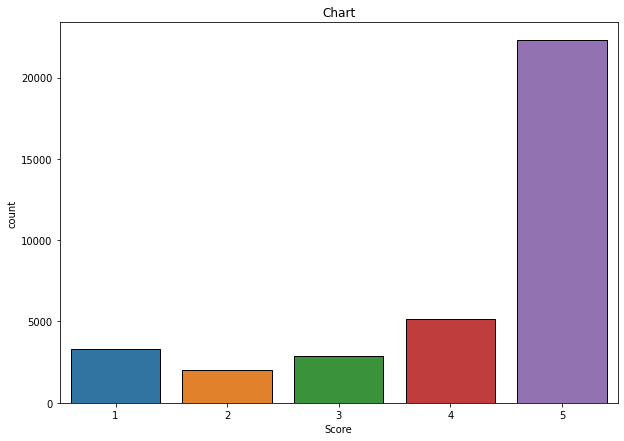

In [54]:
plt.figure(figsize = (10,7))
sns.countplot(dataset['Score'])
plt.title("Chart")

#Check for missing values

In [55]:
print('Number of missing values across columns: \n',dataset.isnull().sum())

Number of missing values across columns: 
              ID           0
ProductId                 0
UserId                    0
ProfileName               1
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   1
Text                      0
dtype: int64


In [56]:
print("Total data ")
print("-"*40)
print("\nTotal no of ratings :",dataset.shape[0])
print("Total No of Users   :", len(np.unique(dataset.UserId)))
print("Total No of products  :", len(np.unique(dataset.ProductId)))

Total data 
----------------------------------------

Total no of ratings : 35617
Total No of Users   : 31563
Total No of products  : 4494


In [57]:
no_of_rated_products_per_user = dataset.groupby(by='UserId')['Score'].count().sort_values(ascending=False)

no_of_rated_products_per_user.head()

UserId
AY12DBB0U420B     31
A1Z54EM24Y40LL    30
A3OXHLG6DIBRW8    24
A1YUL9PCJR3JTY    22
A281NPSIMI1C2R    19
Name: Score, dtype: int64

In [58]:
no_of_rated_products_per_user.describe()

count    31563.000000
mean         1.128442
std          0.631816
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         31.000000
Name: Score, dtype: float64

In [59]:
print('\n No of rated product more than 50 per user : {}\n'.format(sum(no_of_rated_products_per_user >= 25)) )


 No of rated product more than 50 per user : 2



**Distribution review**

5    22282
4     5128
1     3319
3     2870
2     2018
Name: Score, dtype: int64


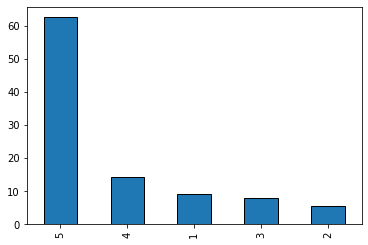

In [60]:
print(dataset['Score'].value_counts())
rating_pct = dataset['Score'].value_counts()/len(dataset) * 100
rating_pct
rating_pct.plot.bar()
plt.show()

**words per review**

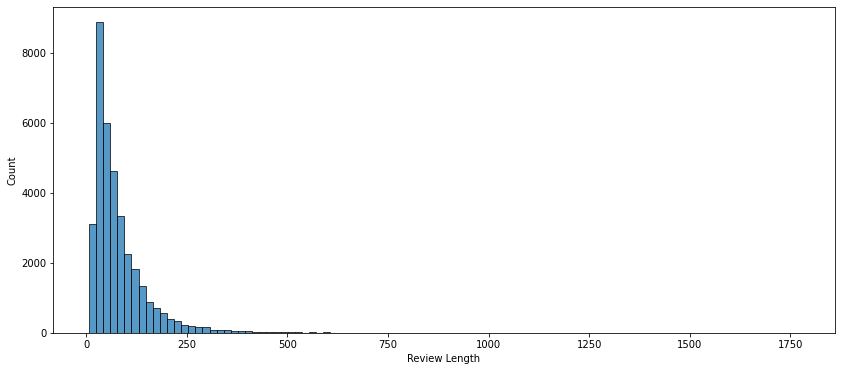

In [61]:

plt.figure(figsize = (14,6))
WordsPerReview = dataset['Text'].apply(lambda x: len(x.split(' ')))

sns.histplot(WordsPerReview,bins = 100)

plt.xlabel('Review Length')
plt.show()

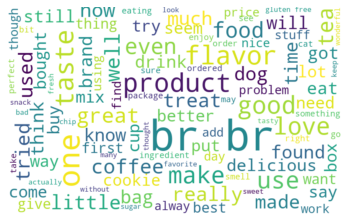

In [62]:
txt = ' '.join(review for review in dataset.Text)
from wordcloud import WordCloud
wordcloud = WordCloud(
            background_color = 'white',
            max_font_size = 100,
            max_words = 100,
            width = 800,
            height = 500
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [63]:
dataset = pd.DataFrame(dataset,columns = ['Score','Text'])
dataset.rename(columns = {'Score':'Rating','Text':'Review'},inplace = True)

In [64]:
def apply_sentiment(Rating):
    if(Rating <=2 ):
        return 0
    else:
        return 1

In [65]:
dataset['Sentiment'] = dataset['Rating'].apply(apply_sentiment)
dataset.drop(['Rating'],axis = 1, inplace = True)

In [66]:
sentiment = dataset['Sentiment'].value_counts()
sentiment

1    30280
0     5337
Name: Sentiment, dtype: int64

In [67]:
def clean_text(Review):
   
    Review = str(Review).lower() # convert to lowercase
    Review = re.sub('\[.*?\]', '', Review) 
    Review = re.sub('https?://\S+|www\.\S+', '', Review) # Remove URls
    Review = re.sub('<.*?>+', '', Review)
    Review = re.sub(r'[^a-z0-9\s]', '', Review) # Remove punctuation
    Review = re.sub('\n', '', Review)
    Review = re.sub('\w*\d\w*', '', Review)
    return Review

In [68]:
dataset['Review']

24750    Our dogs just love them.  I saw them in a pet ...
24749    My dogs loves this chicken but its a product f...
2774     We have used the Victor fly bait for 3 seasons...
2773     Why is this $[...] when the same product is av...
1243     I just received my shipment and could hardly w...
                               ...                        
32548    I was a little nervous about giving this as a ...
32547    This is a resubmittal of a previous review.  O...
32546    Cheesecake arrived within a week of ordering. ...
1477     This coffee supposedly is premium, it tastes w...
5702     Purchased this product at a local store in NY ...
Name: Review, Length: 35617, dtype: object

In [69]:
dataset['Review'] = dataset['Review'].apply(clean_text)

In [70]:
dataset.head()

,Review,Sentiment
24750,our dogs just love them i saw them in a pet s...,1
24749,my dogs loves this chicken but its a product f...,0
2774,we have used the victor fly bait for seasons ...,1
2773,why is this when the same product is availabl...,1
1243,i just received my shipment and could hardly w...,1


In [71]:
X = dataset['Review']
y = dataset['Sentiment']

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42,
                                                   test_size = 0.20)
X_train.shape,X_test.shape,y_train.shape

((28493,), (7124,), (28493,))

# ***Collaberative filtering***

In [ ]:
!pip install surprise

In [73]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split

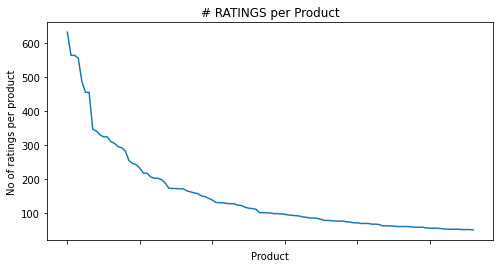

In [75]:
no_of_ratings_per_product = new_Data.groupby(by='ProductId')['Score'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('# RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

In [76]:
new_Data.groupby('ProductId')['Score'].mean().head()
new_Data.groupby('ProductId')['Score'].mean().sort_values(ascending=False).head()

ProductId
B0032RPLSY    4.766667
B000255OIG    4.751445
B00008JOL0    4.744898
B000EVIDUY    4.736264
B0083QJU72    4.696970
Name: Score, dtype: float64

##**Total no of rating for product**

In [77]:
new_Data.groupby('ProductId')['Score'].count().sort_values(ascending=False).head()

ProductId
B002QWP89S    632
B0013NUGDE    564
B007M83302    564
B000KV61FC    556
B000PDY3P0    487
Name: Score, dtype: int64

In [78]:
ratings_mean_count = pd.DataFrame(new_Data.groupby('ProductId')['Score'].mean())

In [79]:
ratings_mean_count['rating_counts'] = pd.DataFrame(new_Data.groupby('ProductId')['Score'].count())

In [23]:
ratings_mean_count.head()

,Score,rating_counts
ProductId,,
B000084ETV,3.692308,130
B00008JOL0,4.744898,98
B000255OIG,4.751445,173
B0007A0AP8,4.600000,55
B000CONMBS,4.529412,85


In [24]:
ratings_mean_count['rating_counts'].max()

632

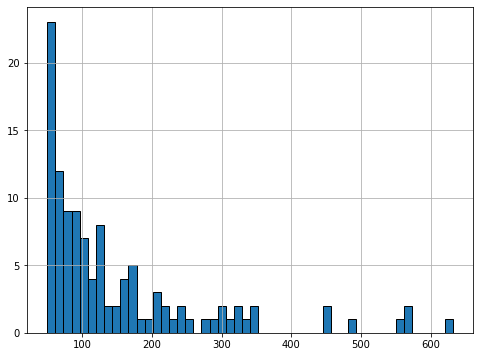

In [80]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

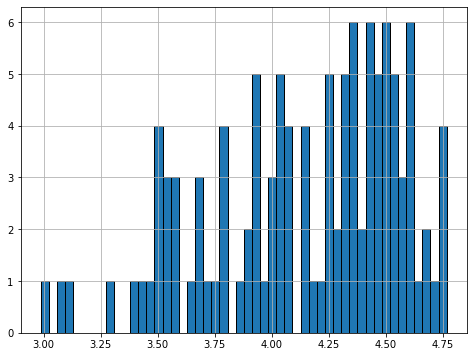

In [29]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['Score'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

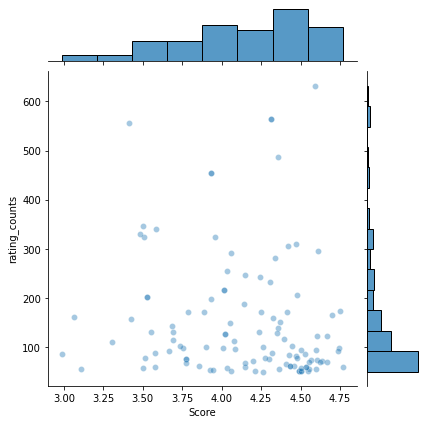

In [81]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Score', y='rating_counts', data=ratings_mean_count, alpha=0.4)

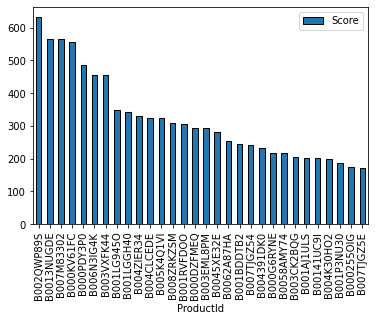

In [82]:
popular_products = pd.DataFrame(new_Data.groupby('ProductId')['Score'].count())
most_popular = popular_products.sort_values('Score', ascending=False)
most_popular.head(30).plot(kind = "bar")

In [83]:
trainset, testset = train_test_split(data, test_size=0.3,random_state=10)

In [84]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [85]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [ ]:
test_pred

 **RMSE(ROOT MEAN SQUARE ERROR)**

In [86]:
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 0.9634


0.9633619489399123